# Proyek Klasifikasi Gambar: [Animals 10](https://huggingface.co/datasets/Rapidata/Animals-10)
- **Nama:** Muhammad Dava Pasha
- **Email:** davapasha16@gmail.com
- **ID Dicoding:** mdavap

## Import Semua Packages/Library yang Digunakan

In [1]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import tensorflow as tf

import numpy as np

import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os

import skimage.io as io
from sklearn.metrics import classification_report

from PIL import Image
import shutil
import warnings
warnings.filterwarnings('ignore')

2024-11-30 15:10:20.498465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732954220.521269    4136 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732954220.531267    4136 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 15:10:20.557954: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.18.0


## Data Preparation

### Data Loading

In [3]:
base_path = './data'
labels = os.listdir(base_path)

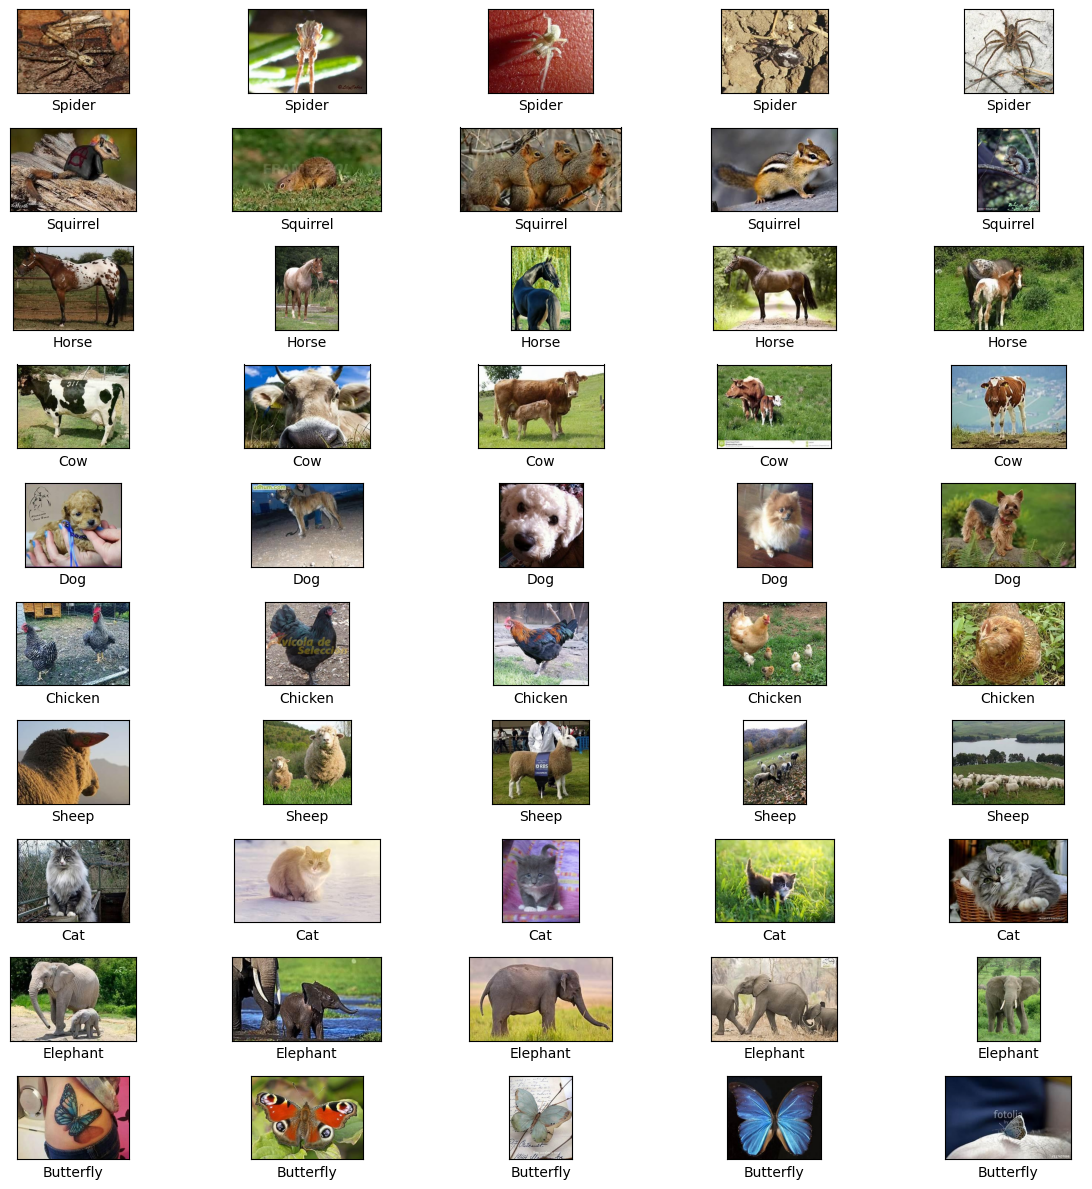

In [4]:
images = {}

for label in labels:
    images[label] = os.listdir(os.path.join(base_path, label))

fig, axs = plt.subplots(len(labels), 5, figsize=(12, 12))

for i, label in enumerate(labels):
    rand_images = np.random.choice(images[label], 5, replace=False)

    for j, filename in enumerate(rand_images):
        filename = os.path.join(base_path, label, filename)
        theImage = Image.open(filename)

        axs[i, j].imshow(theImage)
        axs[i, j].set(xlabel=label, xticks=[], yticks=[])

fig.tight_layout()

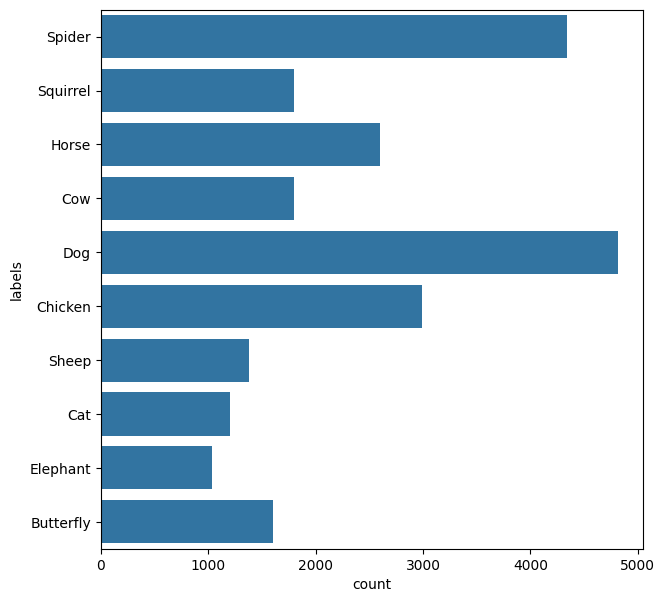

In [5]:
labels_count = []

for label in labels:
    for i in range(len(images[label])):
        labels_count.append(label)


plt.figure(figsize = (7,7))
plot_data = sns.countplot(pd.DataFrame({"labels":labels_count})['labels'])

In [6]:
# Each image resolution is different!

for i, label in enumerate(labels):
    # Pick 5 random images
    rand_images = np.random.choice(images[label], 5, replace=False)
    str_combined = f"Random 5 Images of {label} at resolution: "
    
    for i, filename in enumerate(rand_images):
        filename = os.path.join(base_path, label, filename)
        with Image.open(filename) as img:
            str_combined += f'{img.size}, '
        
    print(str_combined)

Random 5 Images of Spider at resolution: (300, 236), (274, 300), (300, 199), (300, 300), (270, 216), 
Random 5 Images of Squirrel at resolution: (300, 199), (300, 286), (300, 228), (300, 217), (300, 221), 
Random 5 Images of Horse at resolution: (300, 225), (300, 294), (300, 200), (300, 168), (268, 300), 
Random 5 Images of Cow at resolution: (300, 200), (300, 200), (300, 211), (300, 225), (300, 169), 
Random 5 Images of Dog at resolution: (300, 300), (300, 239), (300, 217), (225, 300), (300, 199), 
Random 5 Images of Chicken at resolution: (225, 300), (255, 300), (300, 300), (300, 146), (212, 300), 
Random 5 Images of Sheep at resolution: (300, 236), (271, 194), (226, 300), (300, 249), (300, 225), 
Random 5 Images of Cat at resolution: (300, 271), (300, 188), (300, 240), (300, 240), (300, 251), 
Random 5 Images of Elephant at resolution: (300, 188), (300, 202), (300, 226), (300, 225), (300, 171), 
Random 5 Images of Butterfly at resolution: (300, 200), (300, 276), (300, 300), (300, 22

### Data Augmentation

In [7]:
aug_base_path = './data_aug'

In [12]:
def rotation(img):
    return tf.image.rot90(img, k=np.random.randint(1,4))

def random_flip(img):
    return tf.image.random_flip_up_down(img) if np.random.randint(1,2) == 1 else tf.image.random_flip_up_down(img)

def random_brightness(img):
    return tf.image.random_brightness(img, 0.8)

def random_contrast(img):
    return tf.image.random_contrast(img,  0.2, 0.5)


augmentation_func = [rotation, random_flip, random_brightness, random_contrast]

largest_count = 0

for label in labels:
    img_length = len(images[label])
    if largest_count < img_length:
        largest_count = img_length

# Augmentation to match the largest images count
if not os.path.exists(aug_base_path):
    os.mkdir(aug_base_path)

    for label in labels:
        # Copy old data
        shutil.copytree(os.path.join(base_path, label), os.path.join(aug_base_path, label))

        img_length = len(images[label])
        if img_length < largest_count:
            different = largest_count - img_length
            
            while img_length < largest_count:
                original_image = io.imread(os.path.join(base_path, label, np.random.choice(images[label])))

                # Randomize the augmentation layer
                for i in range(np.random.randint(1, len(augmentation_func))):
                    augmentation = np.random.choice(augmentation_func)
                    original_image = augmentation(original_image)

                new_path = os.path.join(aug_base_path, label, f'{img_length}_aug.jpg')
                io.imsave(new_path, original_image.numpy())
                img_length += 1

            print(f'Augmentated {different} images on {label}!')

I0000 00:00:1732901452.530122    1043 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21770 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:2b:00.0, compute capability: 8.6


Augmentated 471 images on Spider!
Augmentated 3011 images on Squirrel!
Augmentated 2213 images on Horse!
Augmentated 3014 images on Cow!
Augmentated 1818 images on Chicken!
Augmentated 3435 images on Sheep!
Augmentated 3612 images on Cat!
Augmentated 3774 images on Elephant!
Augmentated 3208 images on Butterfly!


### Data Preprocessing

#### Split Dataset

In [8]:
batch_size = 32
img_height = 180
img_width = 180

# 80% and 20% 
# Use augmentation result for training
train_ds = tf.keras.utils.image_dataset_from_directory(
  aug_base_path,
  validation_split=0.2,
  subset="training",
  seed=566,
  image_size=(img_height, img_width), # This resize the image to wanted size
  batch_size=batch_size)

# Use original data for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_path,
  validation_split=0.2,
  subset="validation",
  seed=566,
  image_size=(img_height, img_width), # This resize the image to wanted size
  batch_size=batch_size)

Found 48110 files belonging to 10 classes.
Using 38488 files for training.


I0000 00:00:1732954277.126346    4136 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21770 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:2b:00.0, compute capability: 8.6


Found 23554 files belonging to 10 classes.
Using 4710 files for validation.


In [14]:
# We dont use label from our current variable, because its ordered by folder so we get the label from the directory/train class itself
class_names = train_ds.class_names
print(class_names)

['Butterfly', 'Cat', 'Chicken', 'Cow', 'Dog', 'Elephant', 'Horse', 'Sheep', 'Spider', 'Squirrel']


## Modelling

### Model

In [16]:
num_classes = len(class_names)

model = Sequential([
  # Image is resized thanks to tensorflow keras, so we just need to put a fixed image size!
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # Standarization layer

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), # Batch normalization
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), # Batch normalization
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), # Batch normalization
  layers.MaxPooling2D(),

  layers.Dropout(0.2), # Drop out layer

  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax') # Output layer
])

### Compile the model

In [17]:
model.compile(optimizer='adam', # Use adam for optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,995,498 (15.24 MB)

 Trainable params: 3,995,242 (15.24 MB)

 Non-trainable params: 256 (1.00 KB)

### Training

In [19]:
# Use callback for early stopping
last_epoch = 0
class CallBackYOO(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None): # 
        accuracy = logs.get('accuracy')
        if accuracy >= 0.9: 
            print(f'\nAccuracy {accuracy * 100}% has reached the target at {epoch} epoch!')
            last_epoch = epoch
            self.model.stop_training = True

history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[CallBackYOO()])

Epoch 1/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2948 - loss: 1.9027 - val_accuracy: 0.3807 - val_loss: 1.7581
Epoch 2/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3173 - loss: 1.8201 - val_accuracy: 0.3913 - val_loss: 1.7352
Epoch 3/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3377 - loss: 1.7680 - val_accuracy: 0.4977 - val_loss: 1.4741
Epoch 4/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3636 - loss: 1.6842 - val_accuracy: 0.4699 - val_loss: 1.5737
Epoch 5/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3836 - loss: 1.6290 - val_accuracy: 0.5163 - val_loss: 1.3998
Epoch 6/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4343 - loss: 1.4962 - val_accuracy: 0.5482 - val_loss: 1.2875
Epoch 7/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.4945 - loss: 1.3507 - val_accuracy: 0.6459 - val_loss: 1.0441
Epoch 8/100
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 

## Evaluasi dan Visualisasi

In [20]:
val_predict_result = model.predict(val_ds) 

148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [51]:
prediction_class_index = val_predict_result.argmax(axis=1)
prediction_true_label = np.concatenate([y for x, y in val_ds], axis=0)
print(classification_report(prediction_true_label, prediction_class_index, target_names=class_names))

              precision    recall  f1-score   support

   Butterfly       0.06      0.06      0.06       333
         Cat       0.06      0.06      0.06       227
     Chicken       0.12      0.11      0.11       610
         Cow       0.08      0.08      0.08       362
         Dog       0.20      0.19      0.19       940
    Elephant       0.04      0.05      0.04       209
       Horse       0.12      0.13      0.12       540
       Sheep       0.08      0.08      0.08       287
      Spider       0.18      0.17      0.17       847
    Squirrel       0.07      0.08      0.07       355

    accuracy                           0.12      4710
   macro avg       0.10      0.10      0.10      4710
weighted avg       0.13      0.12      0.12      4710



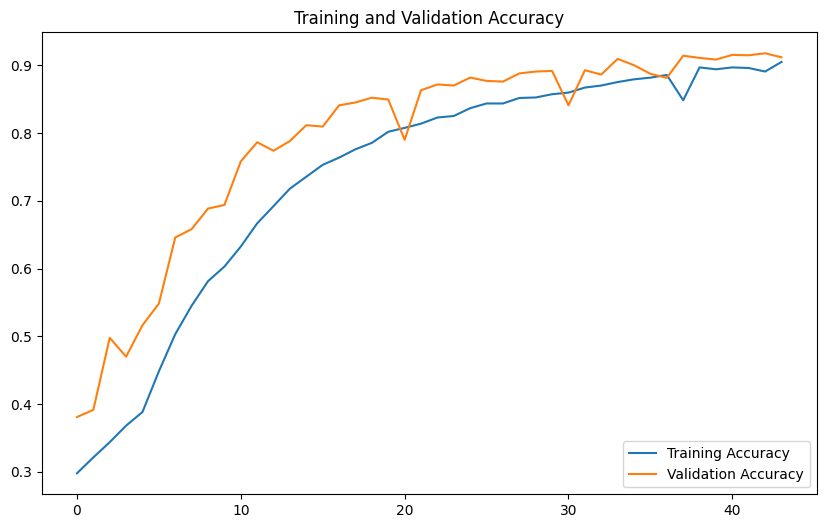

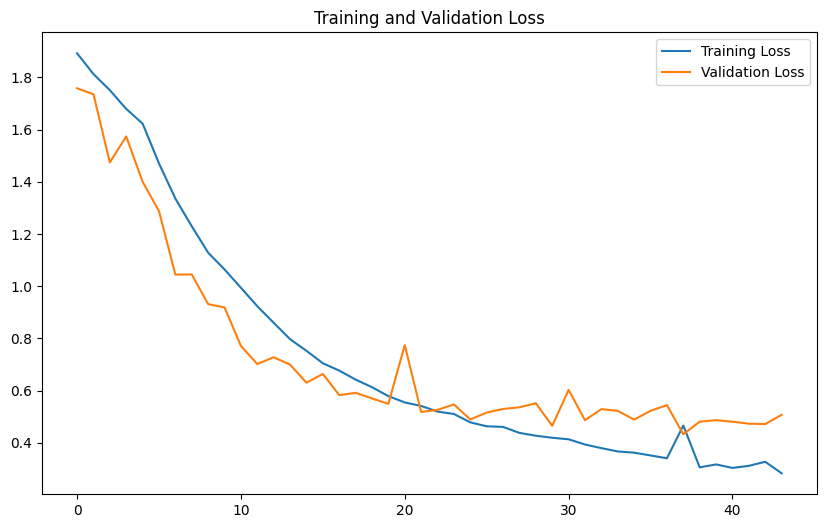

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(last_epoch) # epochs

plt.figure(figsize=(10,6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Konversi Model

In [ ]:
# SavedModel
saved_model_path = './saved_model'
tf.saved_model.save(model, saved_model_path)

# TFLite
tflite_path = './tflite'
os.mkdir(tflite_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open(os.path.join(tflite_path, 'model.tflite'), 'wb') as f:
  f.write(tflite_model)

# Write labels for TFLite
with open(os.path.join(tflite_path, 'label.txt'), 'w') as fs:
    fs.write('\n'.join(class_names))

print('Model has been saved to saved_model and tflite!')

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: /tmp/tmp7keranba/assets


INFO:tensorflow:Assets written to: /tmp/tmp7keranba/assets


Saved artifact at '/tmp/tmp7keranba'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140545020778224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020778752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020781744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020784384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020778928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020783152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020783328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020785440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020787728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140545020785792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1405450207856

W0000 00:00:1732955943.522137    4136 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1732955943.522172    4136 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


Model has been saved to saved_model and tflite!


2024-11-30 15:39:03.522529: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp7keranba
2024-11-30 15:39:03.523397: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-30 15:39:03.523409: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp7keranba
I0000 00:00:1732955943.529950    4136 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-11-30 15:39:03.531155: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-30 15:39:03.585340: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp7keranba
2024-11-30 15:39:03.598490: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 75964 microseconds.


In [54]:
# Saving TFJS model
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model ./saved_model ./tfjs_model

2024-11-30 15:40:28.235137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732956028.244852   18891 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732956028.247783   18891 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 15:40:28.258019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
I0000 

## Inference (Optional)

In [55]:
# Inference using TFLite

tf_lite_path = './tflite/model.tflite'
tf_lite_label_path = './tflite/label.txt'

# Load label from label.txt
thelabels = []
with open(tf_lite_label_path, "r") as f:
    thelabels = f.readlines()

interpreter = tf.lite.Interpreter(model_path=tf_lite_path)
interpreter.get_signature_list()

{'serving_default': {'inputs': ['keras_tensor'], 'outputs': ['output_0']}}

In [56]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [60]:
# Test image from google search
img_width = 180
img_height = 180
test_image_path = './Fesoj_-_Papilio_machaon_(by)_google_search.jpg'

img = tf.keras.utils.load_img(test_image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

prediction_result = classify_lite(keras_tensor=img_array)['output_0'][0].argmax()
print(f'Result prediction of that image is: {thelabels[prediction_result].rstrip()}')


Result prediction of that image is: Butterfly
